FTP do IBGE:

https://geoftp.ibge.gov.br/

Mapas:

https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2020/UFs/SC/

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade pandas

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

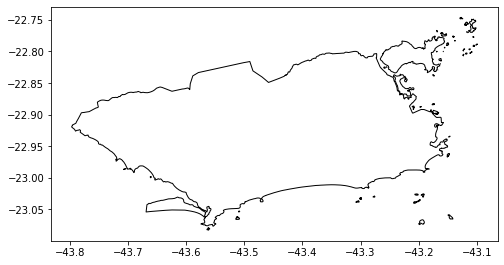

In [67]:
# Mapa do município do Rio de Janeiro
path = '/content/drive/MyDrive/Programacao/GeoPandas/Mapas/RJ/33MUE250GC_SIR.shp'

rj = gpd.read_file(path)
rj = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO']

rj.plot(color='white', edgecolor='black', figsize=(8,8))

In [62]:
# Dados dos imóveis do município do Rio de Janeiro

path = '/content/drive/MyDrive/Programacao/GeoPandas/Dados/dados.txt'

dados = pd.read_table(path)
print(dados)

      Area                    Bairro  ... Transacao    Valor
0      138  Recreio dos Bandeirantes  ...     Venda  1095000
1      133   Freguesia (Jacarepaguá)  ...     Venda   650000
2       46                   Pilares  ...     Venda   150000
3       65           Barra da Tijuca  ...     Venda   430000
4       85                     Gávea  ...     Venda  1800000
...    ...                       ...  ...       ...      ...
4995    48              Campo Grande  ...     Venda   170000
4996    75  Recreio dos Bandeirantes  ...     Venda   550000
4997    32           Jardim Botânico  ...     Venda   580000
4998    85                    Grajaú  ...     Venda   325000
4999    52              Campo Grande  ...     Venda   135000

[5000 rows x 13 columns]


Agora, transformaremos o DataFrame em GeoDataFrame e as colunas Latitude e Longitude em Geometry.

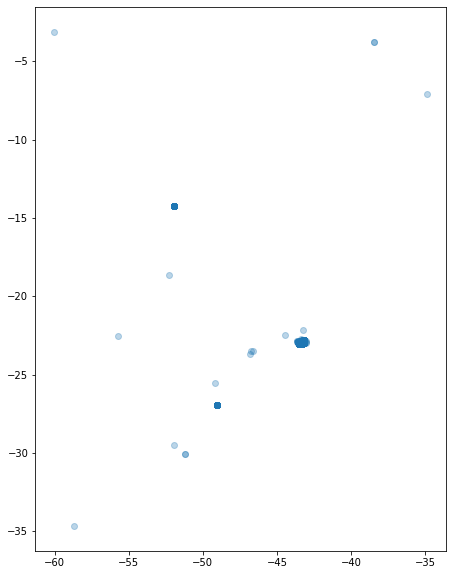

In [59]:
localizacoes = zip(dados.Longitude, dados.Latitude) # iterador com as longitudes e latitudes
geometry = [Point(localizacao) for localizacao in localizacoes] # lista de Points com as localizações

crs = {'proj' : 'latlong',
       'ellps': 'WGS84',
       'datum' : 'WGS84',
       'no_defs' : True}

gdf_dados = gpd.GeoDataFrame(dados, crs = crs, geometry = geometry)
gdf_dados.plot(alpha=0.3, figsize=(8,10))

Devemos equalizar o crs do GeoDataFrame rj e o gdf_dados para UTM.

Como estamos trabalhando com o RJ, sabemos que ele está na zona 23S da projeção UTM e o SIRGAS é utilziado para a América Latina. Podemos pesquisar o código em: 

www.spatialreference.org

Buscamos por Sirgas, existe o código EPSG:31983: SIRGAS 2000 / UTM zone 23S, que é a zona do RJ:

https://www.spatialreference.org/ref/epsg/31983/

Entrando no link proj4 temos o código da projeção:

https://www.spatialreference.org/ref/epsg/31983/proj4/

    +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 

Esse código será utlizado para setar o crs dos dois GeoDataFrames:


In [71]:
print(rj.crs)
print(gdf_dados.crs)

epsg:4674
+proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs +type=crs


In [72]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
gdf_dados = gdf_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [74]:
print(rj.crs)
print(gdf_dados.crs)

+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs +type=crs
+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs +type=crs


In [75]:
print(rj)

      ID  ...                                           geometry
67  1535  ...  MULTIPOLYGON (((692.576 7476.609, 692.572 7476...

[1 rows x 4 columns]


Agora, os dados Geometry não estão mais em Latitude e Longitude, e sim em Km. Dessa forma, podemos medir as distâncias entre os pontos.